# Evaluación Continua 9

### Indicaciones

Para esta EC cuenta con dos bases de datos, una de clientes y otra de compras. 

La base de datos de clientes tiene la siguiente estructura:
- `id_cliente`: identificador único del cliente.
- `nombre`: nombre del cliente.
- `direccion`: dirección del cliente.
- `email`: correo electrónico del cliente.
- `edad`: edad del cliente.
- `fecha_registro`: fecha en la que el cliente se registró.
- `activo`: indica si el cliente está activo o no.

La base de datos de compras tiene la siguiente estructura:
- `id_compra`: identificador único de la compra.
- `id_cliente`: identificador único del cliente que realizó la compra.
- `producto`: producto comprado.
- `cantidad`: cantidad de productos comprados.
- `precio`: precio del producto.
- `fecha_compra`: fecha en la que se realizó la compra.

Usted hará EDA (Exploratory Data Analysis) de ambas bases de datos a través del uso de `matplotlib`, `seaborn` y `plotly`.

In [25]:
import pandas as pd

clientes = pd.read_csv('clientes_limpio.csv')
compras = pd.read_csv('compras_limpio.csv')
#compras.columns

## `matplotlib`

In [26]:
import matplotlib.pyplot as plt


### 1.1. Crear un histograma que muestre la distribución de las edades de los clientes.

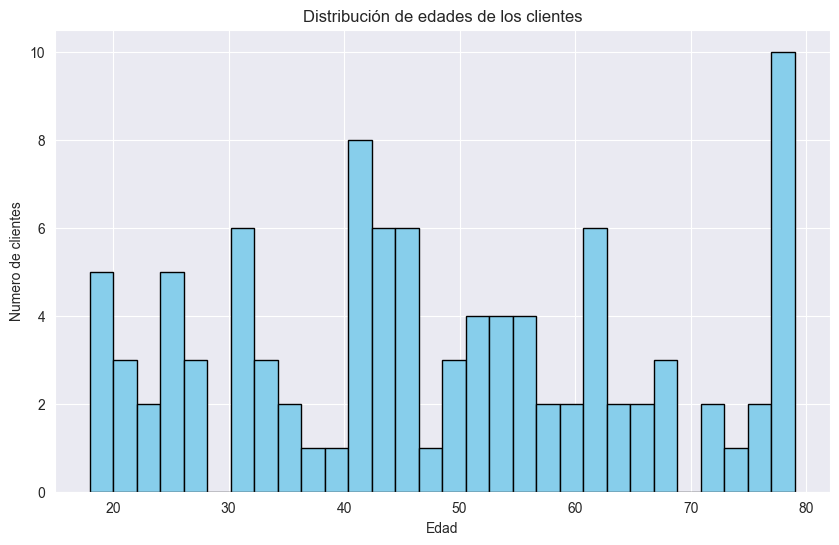

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(clientes['edad'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel('Numero de clientes')
plt.grid(True)
plt.show()

### 1.2 Crear un gráfico de barras que muestre el número de compras realizadas en cada mes del año 2023.

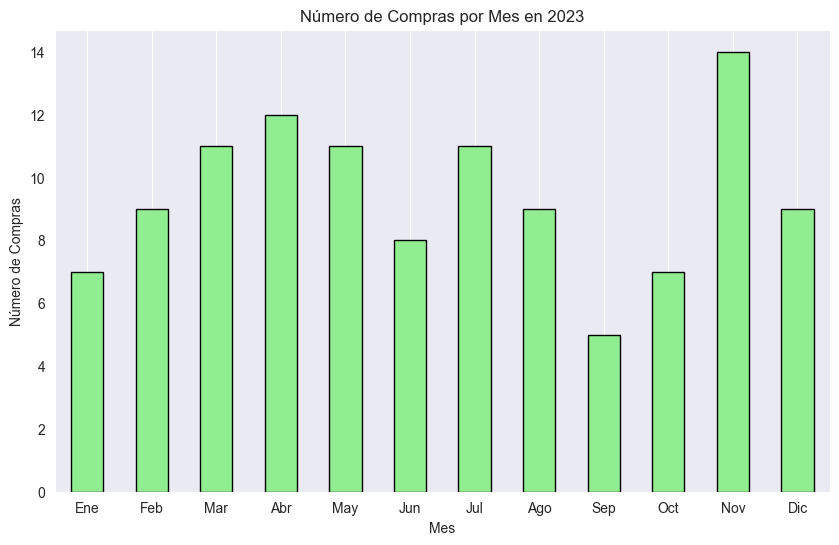

In [28]:
compras['fecha_compra'] = pd.to_datetime(compras['fecha_compra'])
compras['mes'] = compras['fecha_compra'].dt.month
compras_2023 = compras[compras['fecha_compra'].dt.year == 2023]
compras_por_mes = compras_2023.groupby('mes').size()

plt.figure(figsize=(10, 6))
compras_por_mes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Número de Compras por Mes en 2023')
plt.xlabel('Mes')
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.grid(axis='y')
plt.show()


## `seaborn`

In [29]:
import seaborn as sns

### 2.1 Crear un boxplot que muestre la distribución de los precios para cada producto.

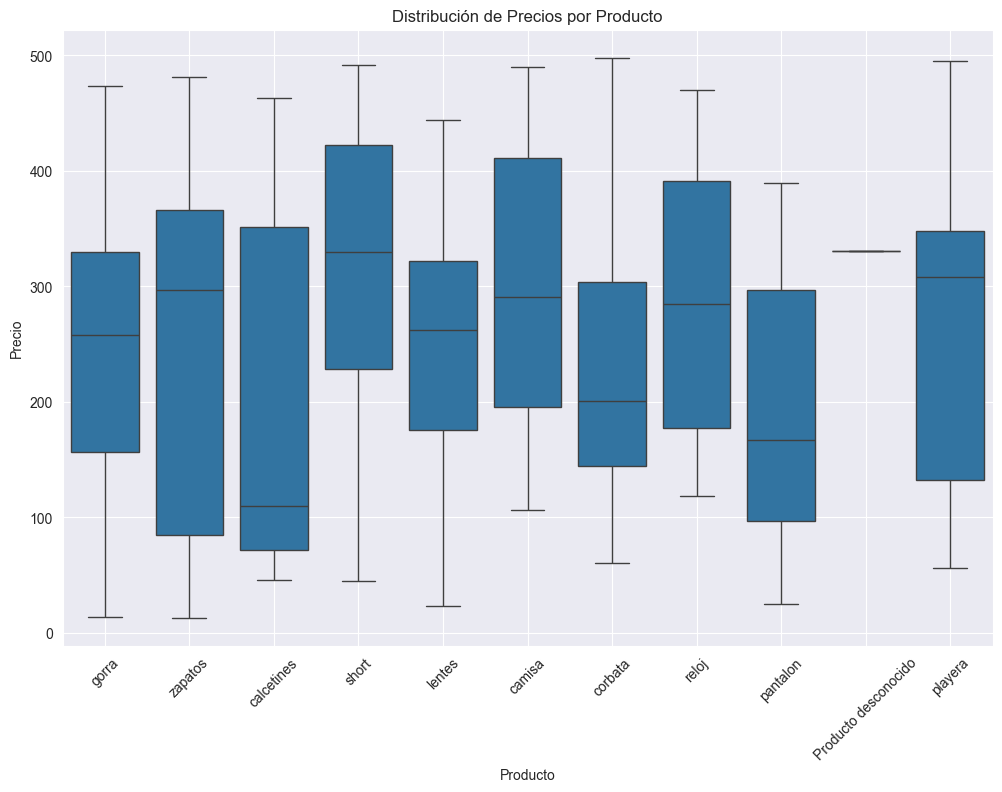

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='producto', y='precio', data=compras)
plt.title('Distribución de Precios por Producto')
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2.2 Crear un regplot que muestre la relación entre la edad de los clientes y su gasto total.

¿Crees que se puede establecer una relación entre la edad de los clientes y su gasto total? ¿Por qué?

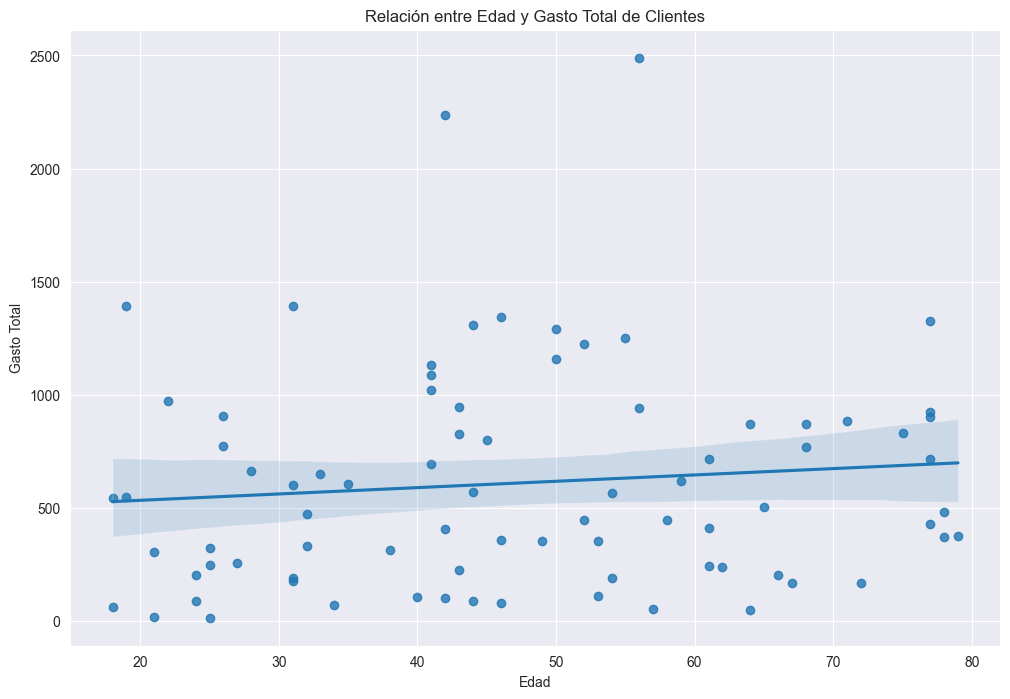

In [31]:
compras_agregadas = compras.groupby('id_cliente').agg({'precio': 'sum'}).reset_index()
clientes_gasto = pd.merge(clientes, compras_agregadas, left_on='id_cliente', right_on='id_cliente', how='inner')
clientes_gasto = clientes_gasto.rename(columns={'precio': 'gasto_total'})

plt.figure(figsize=(12, 8))
sns.regplot(x='edad', y='gasto_total', data=clientes_gasto)
plt.title('Relación entre Edad y Gasto Total de Clientes')
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.grid(True)
plt.show()

## `plotly`

In [32]:
import plotly.express as px

### 3.1 Crear un gráfico de barras interactivo que muestre el top 20 clientes con más compras.

In [33]:
top_clientes = compras.groupby('id_cliente').size().sort_values(ascending=False).head(20)
top_clientes = top_clientes.reset_index().rename(columns={0: 'num_compras'})
top_clientes = pd.merge(top_clientes, clientes, on='id_cliente', how='left')

fig = px.bar(top_clientes, x='nombre', y='num_compras', title='Top 20 Clientes con Más Compras')
fig.show()

### 3.2 Crear un gráfico de líneas que muestre el número de compras realizadas cada mes a lo largo del tiempo.



In [34]:
compras['fecha_compra'] = pd.to_datetime(compras['fecha_compra'])
compras['mes'] = compras['fecha_compra'].dt.to_period('M')
compras_por_mes_tiempo = compras.groupby('mes').size().reset_index().rename(columns={0: 'num_compras'})
compras_por_mes_tiempo['mes'] = compras_por_mes_tiempo['mes'].astype(str)  # Convertir Period a String

fig = px.line(compras_por_mes_tiempo, x='mes', y='num_compras', title='Número de Compras por Mes a lo Largo del Tiempo')
fig.show()